### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3


=== Confusion Matrix ===
[[0 0]
 [2 1]]


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


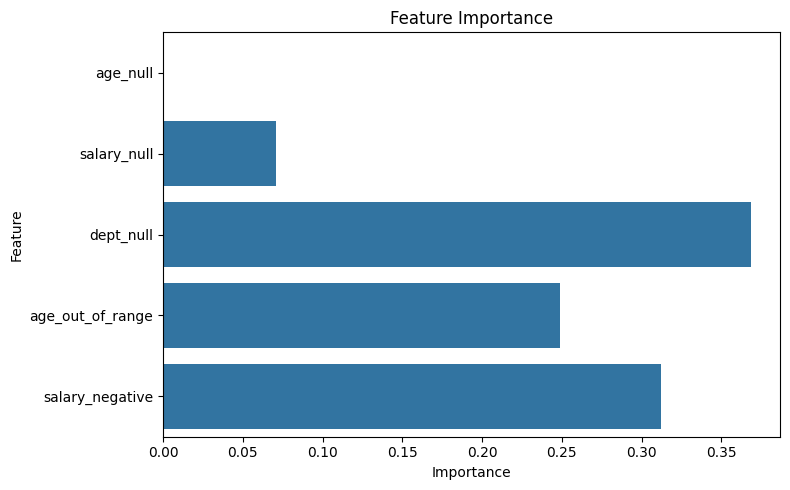

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Generate Sample Data with Data Quality Issues
def generate_data():
    try:
        df = pd.DataFrame({
            'age': [25, np.nan, 22, 45, 38, -5, 999, 30, 44, 35],
            'salary': [50000, 60000, np.nan, 70000, -1000, 90000, 120000, 45000, None, 80000],
            'department': ['HR', 'IT', None, 'Finance', 'HR', 'IT', 'HR', 'Finance', 'HR', None]
        })
        return df
    except Exception as e:
        print(f"Error generating data: {e}")
        return pd.DataFrame()

# Step 2: Label Rows with Data Quality Issues
def label_data(df):
    def has_quality_issue(row):
        if pd.isnull(row['age']) or pd.isnull(row['salary']) or pd.isnull(row['department']):
            return 1
        if row['age'] < 0 or row['age'] > 100:
            return 1
        if row['salary'] < 0:
            return 1
        return 0
    df['quality_issue'] = df.apply(has_quality_issue, axis=1)
    return df

# Step 3: Feature Engineering
def engineer_features(df):
    df['age_null'] = df['age'].isnull().astype(int)
    df['salary_null'] = df['salary'].isnull().astype(int)
    df['dept_null'] = df['department'].isnull().astype(int)
    df['age_out_of_range'] = ((df['age'] < 0) | (df['age'] > 100)).astype(int)
    df['salary_negative'] = (df['salary'] < 0).astype(int)
    return df

# Step 4: Train and Evaluate a Model
def train_model(df):
    features = ['age_null', 'salary_null', 'dept_null', 'age_out_of_range', 'salary_negative']
    target = 'quality_issue'

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))
    print("\n=== Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred))

    # Feature Importance Plot
    importance = pd.Series(model.feature_importances_, index=features)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=importance, y=importance.index)
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    df = generate_data()
    df = label_data(df)
    df = engineer_features(df)
    train_model(df)
